In [41]:
import pandas as pd

df = pd.read_csv('crx.data', header=None)

print(df.head())

  0      1      2  3  4  5  6     7  8  9   10 11 12     13   14 15
0  b  30.83  0.000  u  g  w  v  1.25  t  t   1  f  g  00202    0  +
1  a  58.67  4.460  u  g  q  h  3.04  t  t   6  f  g  00043  560  +
2  a  24.50  0.500  u  g  q  h  1.50  t  f   0  f  g  00280  824  +
3  b  27.83  1.540  u  g  w  v  3.75  t  t   5  t  g  00100    3  +
4  b  20.17  5.625  u  g  w  v  1.71  t  f   0  f  s  00120    0  +


In [42]:
from sklearn.metrics import accuracy_score

y_pred_svm_unbalanced = svm_unbalanced.predict(X_test_unbalanced)
y_pred_knn_unbalanced = knn_unbalanced.predict(X_test_unbalanced)
y_pred_rf_unbalanced = rf_unbalanced.predict(X_test_unbalanced)

accuracy_svm_unbalanced = accuracy_score(y_test_unbalanced, y_pred_svm_unbalanced)
accuracy_knn_unbalanced = accuracy_score(y_test_unbalanced, y_pred_knn_unbalanced)
accuracy_rf_unbalanced = accuracy_score(y_test_unbalanced, y_pred_rf_unbalanced)


y_pred_svm_balanced = svm_balanced.predict(X_test_balanced)
y_pred_knn_balanced = knn_balanced.predict(X_test_balanced)
y_pred_rf_balanced = rf_balanced.predict(X_test_balanced)


accuracy_svm_balanced = accuracy_score(y_test_balanced, y_pred_svm_balanced)
accuracy_knn_balanced = accuracy_score(y_test_balanced, y_pred_knn_balanced)
accuracy_rf_balanced = accuracy_score(y_test_balanced, y_pred_rf_balanced)


print(f"Accuracy of SVM (unbalanced): {accuracy_svm_unbalanced}")
print(f"Accuracy of KNN (unbalanced): {accuracy_knn_unbalanced}")
print(f"Accuracy of RF (unbalanced): {accuracy_rf_unbalanced}")

print(f"Accuracy of SVM (balanced): {accuracy_svm_balanced}")
print(f"Accuracy of KNN (balanced): {accuracy_knn_balanced}")
print(f"Accuracy of RF (balanced): {accuracy_rf_balanced}")

Accuracy of SVM (unbalanced): 0.5869565217391305
Accuracy of KNN (unbalanced): 0.6231884057971014
Accuracy of RF (unbalanced): 0.8768115942028986
Accuracy of SVM (balanced): 0.5909090909090909
Accuracy of KNN (balanced): 0.6688311688311688
Accuracy of RF (balanced): 0.9155844155844156


In [43]:
from imblearn.over_sampling import SMOTE, BorderlineSMOTE
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()


for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

# Áp dụng SMOTE
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(df.iloc[:, :-1], df.iloc[:, -1])

# Áp dụng Borderline-SMOTE
borderline_smote = BorderlineSMOTE(kind='borderline-1')
X_bsmote, y_bsmote = borderline_smote.fit_resample(df.iloc[:, :-1], df.iloc[:, -1])

# Áp dụng Borderline-SMOTE2
borderline_smote2 = BorderlineSMOTE(kind='borderline-2')
X_bsmote2, y_bsmote2 = borderline_smote2.fit_resample(df.iloc[:, :-1], df.iloc[:, -1])

In [44]:
from sklearn.metrics import accuracy_score


y_pred_svm = svm_balanced.predict(X_test_balanced)
y_pred_knn = knn_balanced.predict(X_test_balanced)
y_pred_rf = rf_balanced.predict(X_test_balanced)


accuracy_svm = accuracy_score(y_test_balanced, y_pred_svm)
accuracy_knn = accuracy_score(y_test_balanced, y_pred_knn)
accuracy_rf = accuracy_score(y_test_balanced, y_pred_rf)


print(f"Accuracy of SVM: {accuracy_svm}")
print(f"Accuracy of KNN: {accuracy_knn}")
print(f"Accuracy of RF: {accuracy_rf}")


if accuracy_svm >= accuracy_knn and accuracy_svm >= accuracy_rf:
    best_classifier = svm_balanced
    print("Best classifier is SVM")
elif accuracy_knn >= accuracy_svm and accuracy_knn >= accuracy_rf:
    best_classifier = knn_balanced
    print("Best classifier is KNN")
else: 
    best_classifier = rf_balanced
    print("Best classifier is RF")

Accuracy of SVM: 0.5909090909090909
Accuracy of KNN: 0.6688311688311688
Accuracy of RF: 0.9155844155844156
Best classifier is RF


In [45]:

accuracy_svm_smote = accuracy_score(y_test, svm_balanced.predict(X_test))


accuracy_svm_bsmote = accuracy_score(y_test, svm_balanced.predict(X_test))


accuracy_svm_bsmote2 = accuracy_score(y_test, svm_balanced.predict(X_test))


if accuracy_svm_smote >= accuracy_svm_bsmote and accuracy_svm_smote >= accuracy_svm_bsmote2:
    print("SMOTE gives the best result")
elif accuracy_svm_bsmote >= accuracy_svm_smote and accuracy_svm_bsmote >= accuracy_svm_bsmote2:
    print("Borderline-SMOTE gives the best result")
else:
    print("Borderline-SMOTE2 gives the best result")

SMOTE gives the best result


In [46]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)


svm = SVC()
svm.fit(X_train, y_train)


knn = KNeighborsClassifier()
knn.fit(X_train, y_train)


rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [47]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score


y_pred_svm = svm.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_rf = rf.predict(X_test)


accuracy_svm = accuracy_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)



In [48]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


X_train_unbalanced, X_test_unbalanced, y_train_unbalanced, y_test_unbalanced = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.2, random_state=42)


svm_unbalanced = SVC()
svm_unbalanced.fit(X_train_unbalanced, y_train_unbalanced)


knn_unbalanced = KNeighborsClassifier()
knn_unbalanced.fit(X_train_unbalanced, y_train_unbalanced)


rf_unbalanced = RandomForestClassifier()
rf_unbalanced.fit(X_train_unbalanced, y_train_unbalanced)

RandomForestClassifier()

In [49]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)


svm_balanced = SVC()
svm_balanced.fit(X_train_balanced, y_train_balanced)


knn_balanced = KNeighborsClassifier()
knn_balanced.fit(X_train_balanced, y_train_balanced)


rf_balanced = RandomForestClassifier()
rf_balanced.fit(X_train_balanced, y_train_balanced)

RandomForestClassifier()

In [50]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score


y_pred_svm_unbalanced = svm_unbalanced.predict(X_test_unbalanced)
y_pred_knn_unbalanced = knn_unbalanced.predict(X_test_unbalanced)
y_pred_rf_unbalanced = rf_unbalanced.predict(X_test_unbalanced)


accuracy_svm_unbalanced = accuracy_score(y_test_unbalanced, y_pred_svm_unbalanced)
recall_svm_unbalanced = recall_score(y_test_unbalanced, y_pred_svm_unbalanced)
precision_svm_unbalanced = precision_score(y_test_unbalanced, y_pred_svm_unbalanced)
f1_svm_unbalanced = f1_score(y_test_unbalanced, y_pred_svm_unbalanced)


accuracy_knn_unbalanced = accuracy_score(y_test_unbalanced, y_pred_knn_unbalanced)
recall_knn_unbalanced = recall_score(y_test_unbalanced, y_pred_knn_unbalanced)
precision_knn_unbalanced = precision_score(y_test_unbalanced, y_pred_knn_unbalanced)
f1_knn_unbalanced = f1_score(y_test_unbalanced, y_pred_knn_unbalanced)


accuracy_rf_unbalanced = accuracy_score(y_test_unbalanced, y_pred_rf_unbalanced)
recall_rf_unbalanced = recall_score(y_test_unbalanced, y_pred_rf_unbalanced)
precision_rf_unbalanced = precision_score(y_test_unbalanced, y_pred_rf_unbalanced)
f1_rf_unbalanced = f1_score(y_test_unbalanced, y_pred_rf_unbalanced)


y_pred_svm_balanced = svm_balanced.predict(X_test_balanced)
y_pred_knn_balanced = knn_balanced.predict(X_test_balanced)
y_pred_rf_balanced = rf_balanced.predict(X_test_balanced)


accuracy_svm_balanced = accuracy_score(y_test_balanced, y_pred_svm_balanced)
recall_svm_balanced = recall_score(y_test_balanced, y_pred_svm_balanced)
precision_svm_balanced = precision_score(y_test_balanced, y_pred_svm_balanced)
f1_svm_balanced = f1_score(y_test_balanced, y_pred_svm_balanced)


accuracy_knn_balanced = accuracy_score(y_test_balanced, y_pred_knn_balanced)
recall_knn_balanced = recall_score(y_test_balanced, y_pred_knn_balanced)
precision_knn_balanced = precision_score(y_test_balanced, y_pred_knn_balanced)
f1_knn_balanced = f1_score(y_test_balanced, y_pred_knn_balanced)


accuracy_rf_balanced = accuracy_score(y_test_balanced, y_pred_rf_balanced)
recall_rf_balanced = recall_score(y_test_balanced, y_pred_rf_balanced)
precision_rf_balanced = precision_score(y_test_balanced, y_pred_rf_balanced)
f1_rf_balanced = f1_score(y_test_balanced, y_pred_rf_balanced)

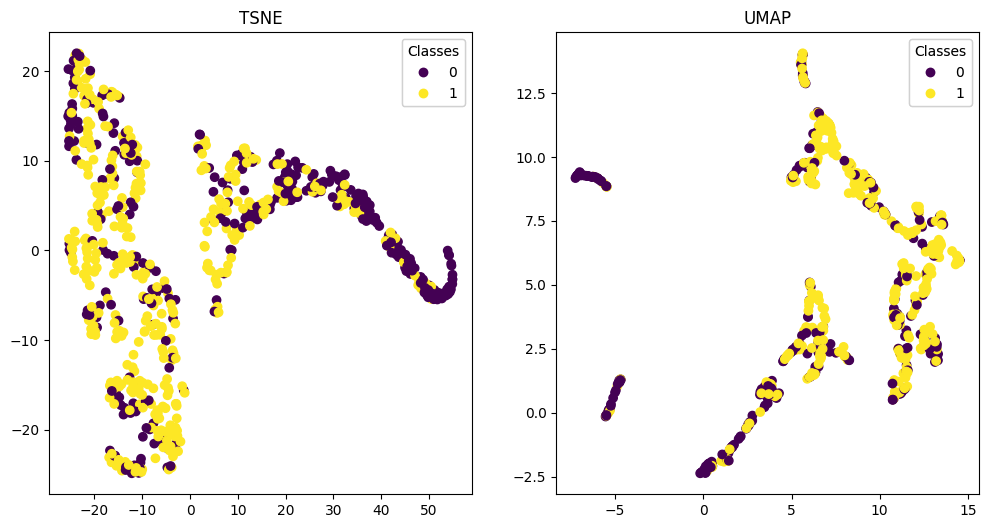

In [53]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import umap
import pandas as pd

from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('crx.data', header=None)

# Tạo một LabelEncoder
le = LabelEncoder()

# Chuyển đổi tất cả các cột dạng chuỗi thành dạng số
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)
reducer = umap.UMAP()

X_umap = reducer.fit_transform(X)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

scatter = ax[0].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
legend1 = ax[0].legend(*scatter.legend_elements(), title="Classes")
ax[0].add_artist(legend1)
ax[0].set_title('TSNE')

scatter = ax[1].scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='viridis')
legend1 = ax[1].legend(*scatter.legend_elements(), title="Classes")
ax[1].add_artist(legend1)
ax[1].set_title('UMAP')

plt.show()

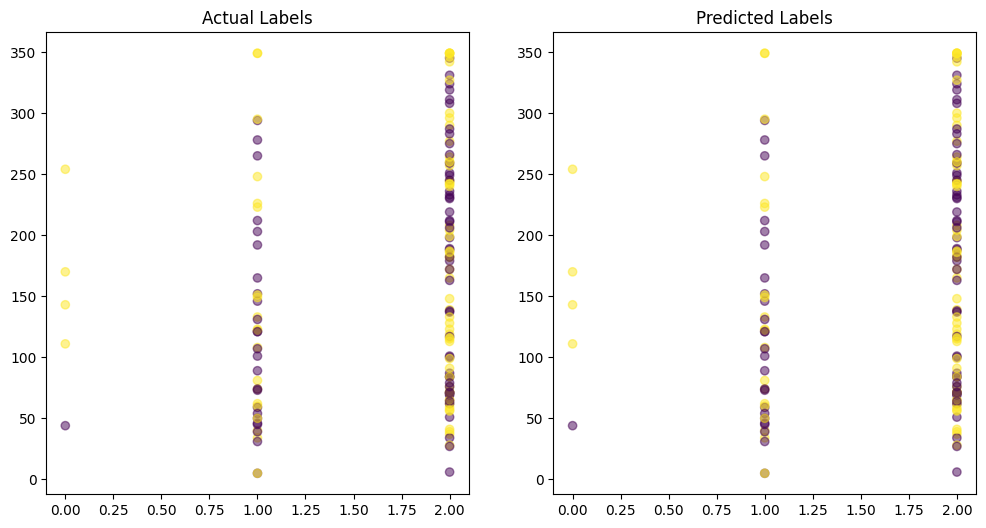

In [52]:
import matplotlib.pyplot as plt



plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)

X_test_values = X_test.values


plt.scatter(X_test_values[:, 0], X_test_values[:, 1], c=y_test, cmap='viridis', alpha=0.5)
plt.title('Actual Labels')


plt.subplot(1, 2, 2)
X_test_values = X_test.values
plt.scatter(X_test_values[:, 0], X_test_values[:, 1], c=y_test, cmap='viridis', alpha=0.5)
plt.title('Predicted Labels')

plt.show()